<a href="https://colab.research.google.com/github/SidharthArya/Computer_Vision_Class_Manit/blob/main/Assignments/001_Enlarge_the_size_of_image_using_various_interpolation_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
# CV2 for comparison
import cv2

In [2]:
# Downloading Image
!curl -o image.jpg https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.doglistener.co.uk%2Fsites%2Fdefault%2Ffiles%2FPuppy-Beagle.jpg&f=1&nofb=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 46723    0 46723    0     0   145k      0 --:--:-- --:--:-- --:--:--  145k


In [3]:
im = image.imread('image.jpg',format='jpg')
imref = cv2.imread('image.jpg')
im, imref

(array([[[192, 188, 211],
         [192, 188, 211],
         [192, 188, 211],
         ...,
         [172, 169, 178],
         [173, 170, 179],
         [173, 170, 179]],
 
        [[192, 188, 211],
         [192, 188, 211],
         [192, 188, 211],
         ...,
         [173, 170, 179],
         [173, 170, 179],
         [173, 170, 179]],
 
        [[192, 188, 211],
         [192, 188, 211],
         [191, 187, 210],
         ...,
         [174, 171, 180],
         [174, 171, 180],
         [174, 171, 180]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [4]:
im.size, imref.size

(607500, 607500)

In [5]:
im.shape, imref.shape

((450, 450, 3), (450, 450, 3))

# Images

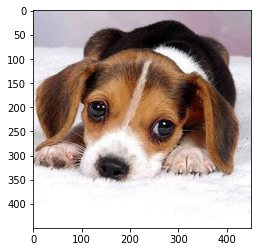

In [6]:
## using np.flip because cv2 reads image in BGR format

plt.imshow(np.flip(imref,axis=2))

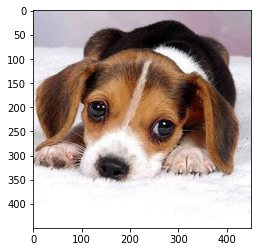

In [7]:
plt.imshow(im)

In [8]:
np.flip(imref,axis=2).reshape(-1).shape, im.reshape(-1).shape

((607500,), (607500,))

In [9]:
(np.flip(imref,axis=2).reshape(-1) == im.reshape(-1))[476362]

True

In [10]:
sample =np.array([[[0,0,0],[255,255,255]],[[255,255,255],[0,0,0]]])

sample.shape

(2, 2, 3)

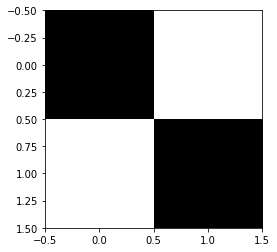

In [11]:
plt.imshow(sample)

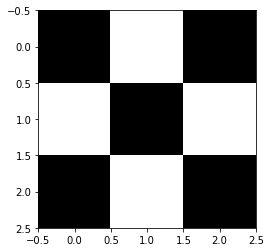

In [12]:
sample_2 =np.array([[[0,0,0],[255,255,255], [0,0,0]],[[255,255,255],[0,0,0], [255,255,255]], [[0,0,0],[255,255,255], [0,0,0]]])
plt.imshow(sample_2)

# Resizing


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[  0.,   0.,   0.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [  0.,   0.,   0.]]], dtype=float32)

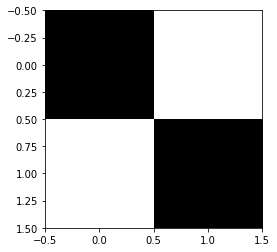

In [13]:
plt.imshow(sample.astype(np.float32))

sample.astype(np.float32)

### Bilinear

In [14]:
# Implementing Bilinear

def inter_linear_resize(im, shape=im.shape, debug=False):
  im_shape=(im.shape[0], im.shape[1])

  scaling_factor=((shape[0]-1)*1.0/(im.shape[0] -1), (shape[1]-1)*1.0/(im.shape[1] -1))


  try:
    channels = im.shape[2]

  except:

    channels = 1


  output = np.ones((shape[0], shape[1], channels)).astype(np.uint8)*-1

  if debug:
    plt.imshow(output)
    plt.show()
  for i, row in enumerate(im):
    for j, column in enumerate(output[int(i*scaling_factor[0])]):
        if column[0] != -1:
          continue


        v = j*1.0/scaling_factor[1]
        weight = v - int(v)

        try:
          output[int(i*scaling_factor[0]), j] = (1-weight)*im[i, int(v)] + weight* im[i, int(v)+1]

        except:
          output[int(i*scaling_factor[0]), j] =im[i, int(v)]
    
    if debug:
      plt.imshow(output)
      plt.show()

  for i, row in enumerate(output):
      v = i*1.0/scaling_factor[0]
      weight = v - int(v)
      try:
        output[i] = output[int(int(v)*scaling_factor[0])]*(1 - weight) + output[int((int(v)+1)*scaling_factor[0])]*weight
      except:
        output[i] = output[int(int(v)*scaling_factor[0])]

  
  if debug:
    plt.imshow(output)
    plt.show()

    for i, row in enumerate(output):
      plt.plot(np.array(range(output.shape[1])),output[i])
      plt.plot(np.array(range(output.shape[1])),output[i], "ro")
      plt.show()

  return output[:shape[0],:shape[1], :channels]


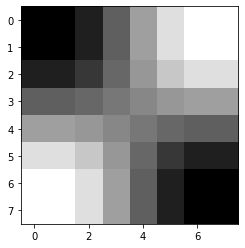

In [15]:
# Comparison between opencv and my algorithm
plt.imshow(cv2.resize(sample.astype(np.float32), (8,8), interpolation=cv2.INTER_LINEAR).astype(np.int))



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


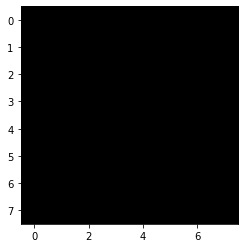

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


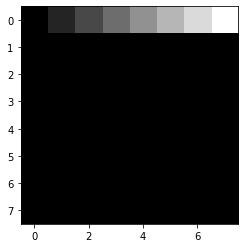

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


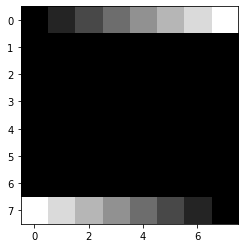

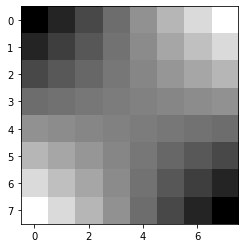

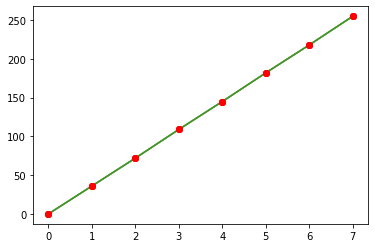

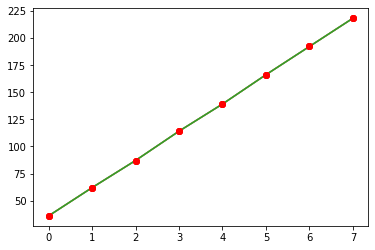

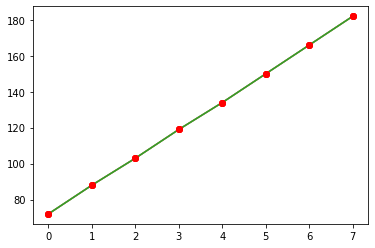

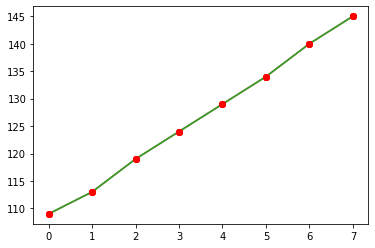

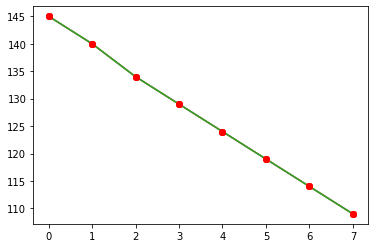

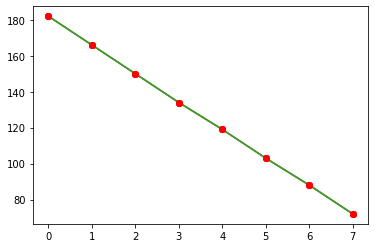

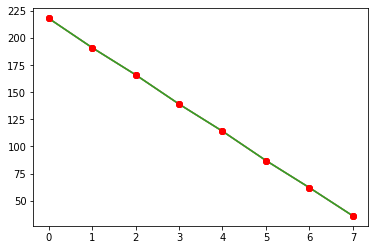

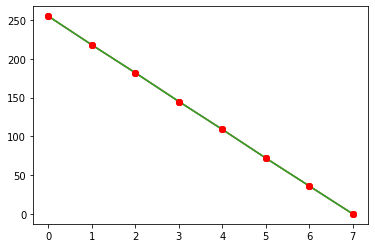

array([[[  0,   0,   0],
        [ 36,  36,  36],
        [ 72,  72,  72],
        [109, 109, 109],
        [145, 145, 145],
        [182, 182, 182],
        [218, 218, 218],
        [255, 255, 255]],

       [[ 36,  36,  36],
        [ 62,  62,  62],
        [ 87,  87,  87],
        [114, 114, 114],
        [139, 139, 139],
        [166, 166, 166],
        [192, 192, 192],
        [218, 218, 218]],

       [[ 72,  72,  72],
        [ 88,  88,  88],
        [103, 103, 103],
        [119, 119, 119],
        [134, 134, 134],
        [150, 150, 150],
        [166, 166, 166],
        [182, 182, 182]],

       [[109, 109, 109],
        [113, 113, 113],
        [119, 119, 119],
        [124, 124, 124],
        [129, 129, 129],
        [134, 134, 134],
        [140, 140, 140],
        [145, 145, 145]],

       [[145, 145, 145],
        [140, 140, 140],
        [134, 134, 134],
        [129, 129, 129],
        [124, 124, 124],
        [119, 119, 119],
        [114, 114, 114],
        [109, 109

In [16]:

inter_linear_resize(sample, (8,8), debug=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


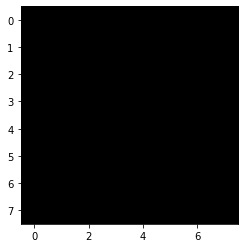

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


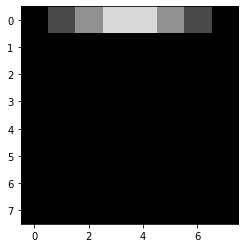

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


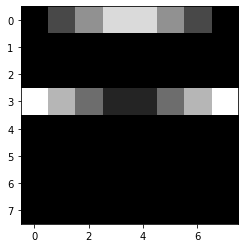

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


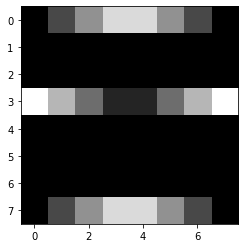

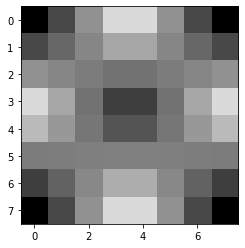

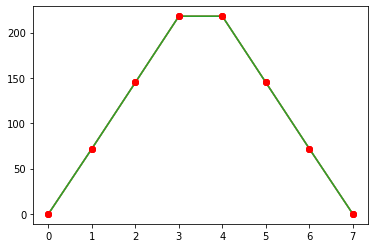

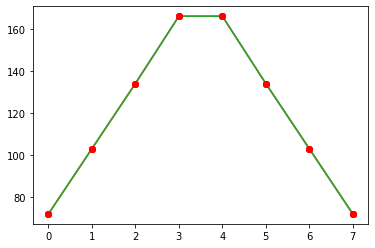

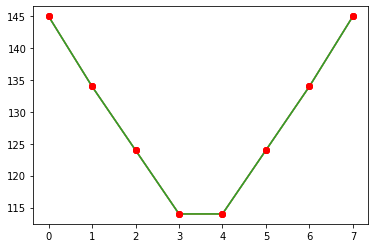

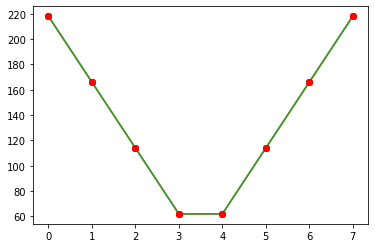

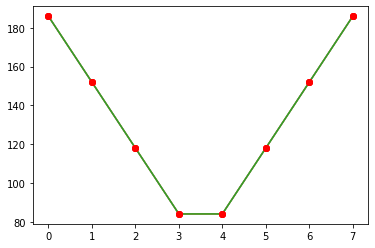

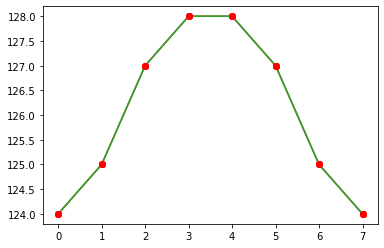

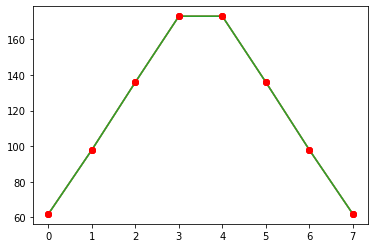

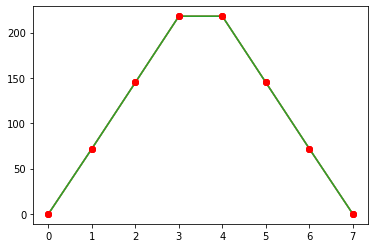

array([[[  0,   0,   0],
        [ 72,  72,  72],
        [145, 145, 145],
        [218, 218, 218],
        [218, 218, 218],
        [145, 145, 145],
        [ 72,  72,  72],
        [  0,   0,   0]],

       [[ 72,  72,  72],
        [103, 103, 103],
        [134, 134, 134],
        [166, 166, 166],
        [166, 166, 166],
        [134, 134, 134],
        [103, 103, 103],
        [ 72,  72,  72]],

       [[145, 145, 145],
        [134, 134, 134],
        [124, 124, 124],
        [114, 114, 114],
        [114, 114, 114],
        [124, 124, 124],
        [134, 134, 134],
        [145, 145, 145]],

       [[218, 218, 218],
        [166, 166, 166],
        [114, 114, 114],
        [ 62,  62,  62],
        [ 62,  62,  62],
        [114, 114, 114],
        [166, 166, 166],
        [218, 218, 218]],

       [[186, 186, 186],
        [152, 152, 152],
        [118, 118, 118],
        [ 84,  84,  84],
        [ 84,  84,  84],
        [118, 118, 118],
        [152, 152, 152],
        [186, 186

In [17]:

inter_linear_resize(sample_2, (8,8), debug=True)


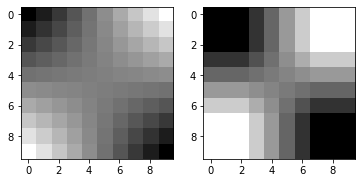

In [18]:
sample2 = inter_linear_resize(sample, shape=(10,10)).astype(np.int32)
fig, ax = plt.subplots(1,2)
ax[0].imshow(sample2)

ax[1].imshow(cv2.resize(sample.astype(np.float32), (10,10), interpolation=cv2.INTER_LINEAR).astype(np.int))

In [19]:
## OpenCV uses a different formula for linear interpolation

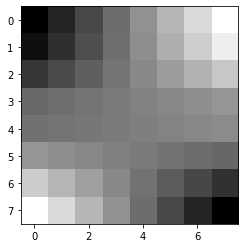

In [20]:
## Downscaling

plt.imshow(inter_linear_resize(sample2, shape=(8,8)).astype(np.int32))


In [21]:
sample2 = inter_linear_resize(sample, shape=(8,8)).astype(np.int32)

In [22]:
## Downscaling

inter_linear_resize(sample2, shape=(4,4), debug=False)


array([[[  0,   0,   0],
        [ 84,  84,  84],
        [169, 169, 169],
        [255, 255, 255]],

       [[ 36,  36,  36],
        [ 96,  96,  96],
        [156, 156, 156],
        [218, 218, 218]],

       [[133, 133, 133],
        [128, 128, 128],
        [123, 123, 123],
        [120, 120, 120]],

       [[255, 255, 255],
        [169, 169, 169],
        [ 84,  84,  84],
        [  0,   0,   0]]], dtype=int16)

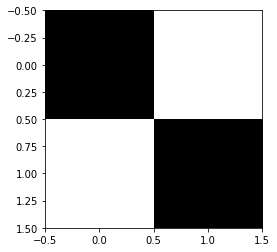

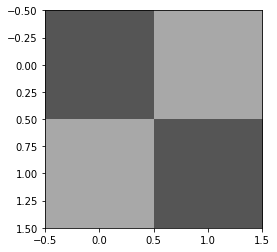

In [23]:
## Downscaling

plt.imshow(inter_linear_resize(sample2, shape=(2,2)))
plt.show()

plt.imshow(cv2.resize(sample2.astype(np.float32), (2,2)).astype(np.uint8))

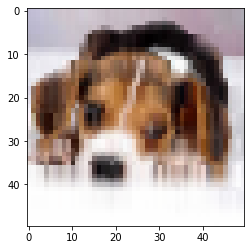

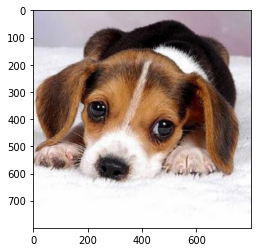

In [24]:
## Using on actual image

### Underscaling
plt.imshow(inter_linear_resize(im, (50, 50)))
plt.show()

### Overscaling
plt.imshow(inter_linear_resize(im, (800, 800)))

plt.show()

### Nearest Neighbor

In [25]:
def inter_nearest_resize(im, shape=im.shape, debug=False):
  im_shape=(im.shape[0], im.shape[1])
  scaling_factor=((shape[0]-1)*1.0/(im.shape[0] -1), (shape[1]-1)*1.0/(im.shape[1] -1))

  try:
    channels = im.shape[2]

  except:

    channels = 1
  output = np.ones((shape[0], shape[1], channels)).astype(np.int32)*-1
  Is = (np.array(range(2))*scaling_factor[0]).astype(np.int32)    # filled rows
  for i, row in enumerate(output):
    vi = i*1.0/scaling_factor[0]
    wi = vi - int(vi)

    for j, column in enumerate(row):
        vj = j*1.0/scaling_factor[1]
        wj = vj - int(vj)

        oi = int(vi) if wi <= 0.5 else int(vi)+1

        oj = int(vj) if wj <= 0.5 else int(vj)+1
        output[i,j] = im[oi,oj]
    if debug:
      plt.imshow(output)
      plt.show()

  if debug:
    for i, row in enumerate(output):
      plt.plot(np.array(range(output.shape[1])),output[i])
      plt.plot(np.array(range(output.shape[1])),output[i], "ro")
      plt.show()

  return output[:shape[0],:shape[1], :channels]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


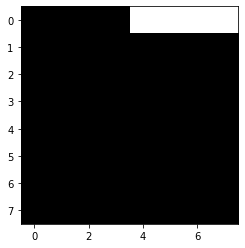

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


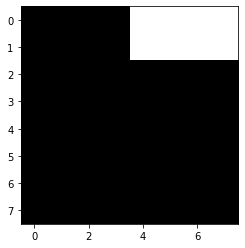

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


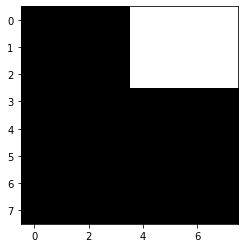

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


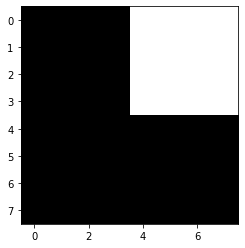

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


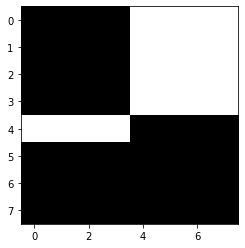

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


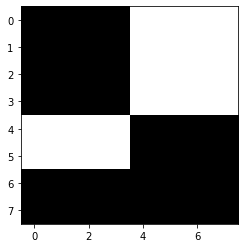

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


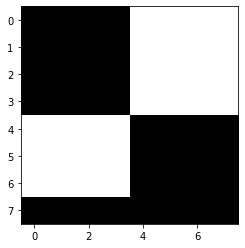

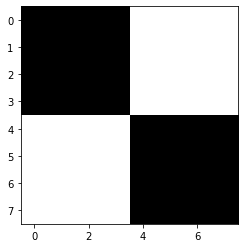

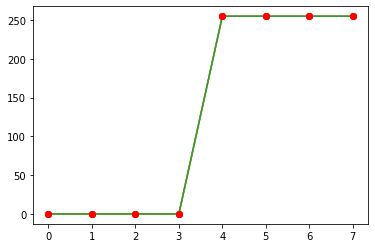

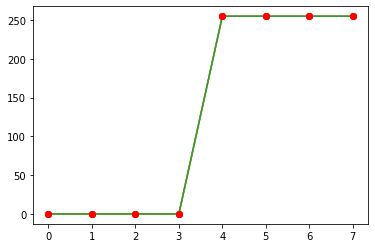

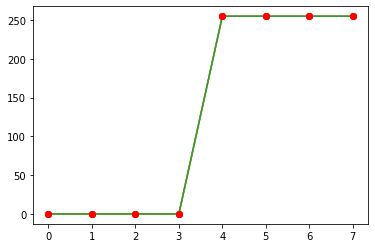

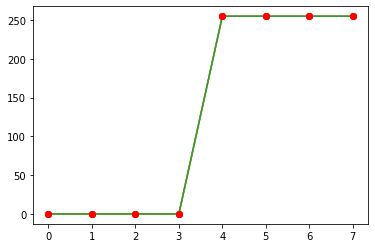

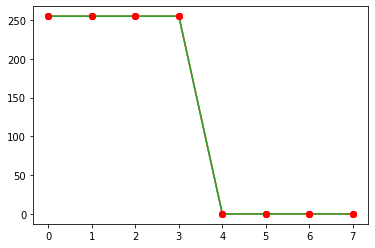

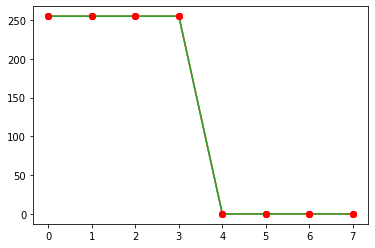

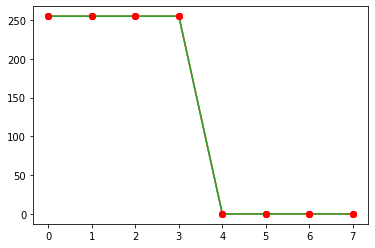

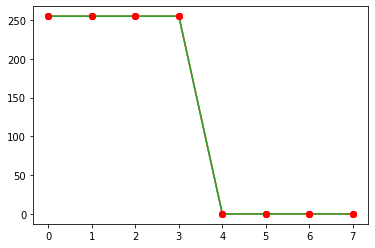

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0

In [26]:

inter_nearest_resize(sample, shape=(8,8), debug=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


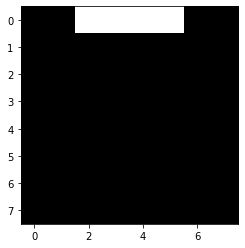

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


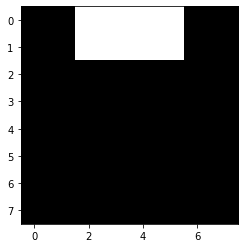

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


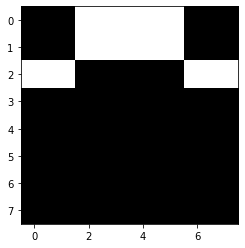

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


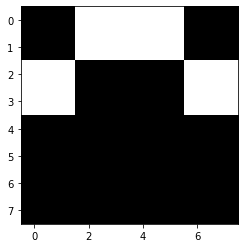

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


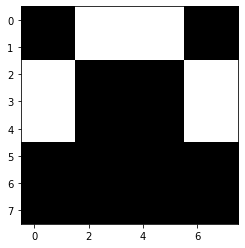

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


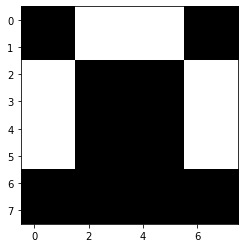

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


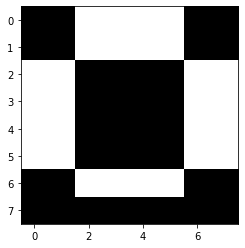

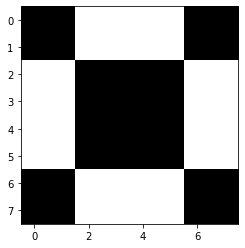

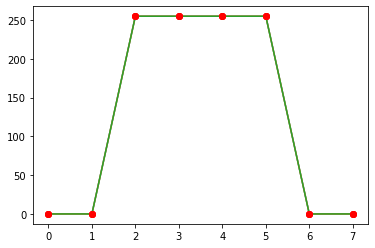

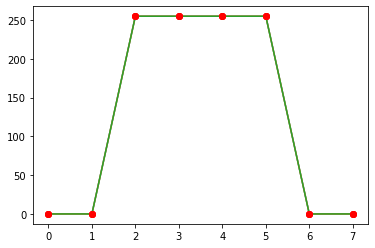

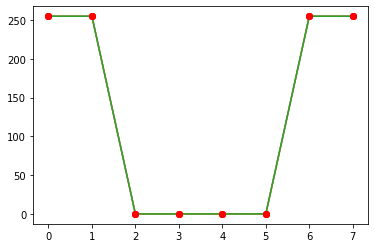

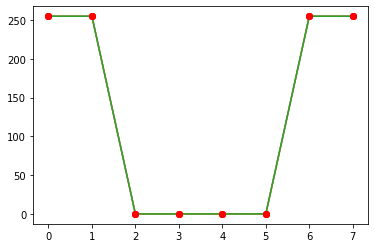

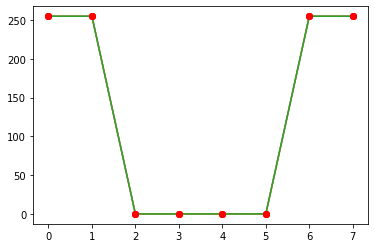

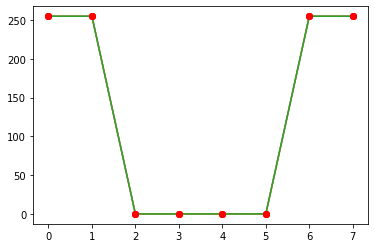

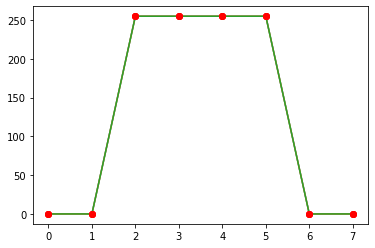

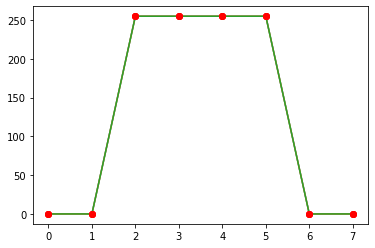

array([[[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255

In [27]:

inter_nearest_resize(sample_2, shape=(8,8), debug=True)

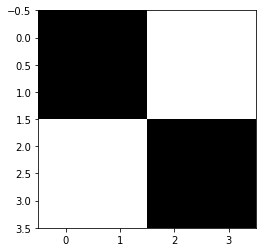

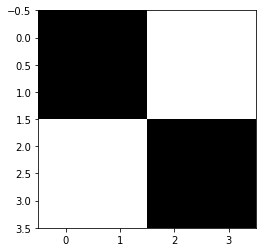

In [28]:
# Comparison between opencv and my algorithm
plt.imshow(cv2.resize(sample.astype(np.float32), (4,4), interpolation=cv2.INTER_NEAREST).astype(np.int))

plt.show()
plt.imshow(inter_nearest_resize(sample, (4,4)).astype(np.int))

plt.show()

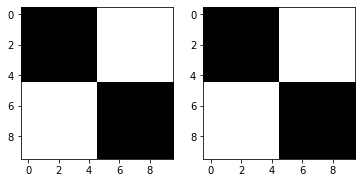

In [29]:
sample2 = inter_nearest_resize(sample, shape=(10,10)).astype(np.int32)
fig, ax = plt.subplots(1,2)
ax[0].imshow(sample2)

ax[1].imshow(cv2.resize(sample.astype(np.float32), (10,10), interpolation=cv2.INTER_NEAREST).astype(np.int))

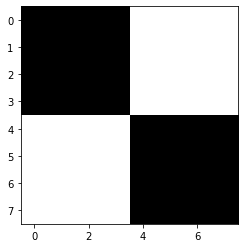

In [30]:
## Downscaling

plt.imshow(inter_nearest_resize(sample2, shape=(8,8)).astype(np.int32))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


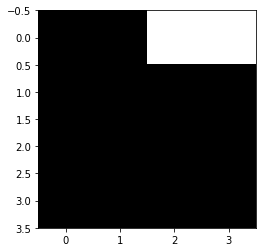

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


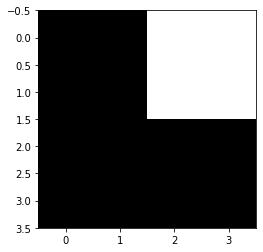

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


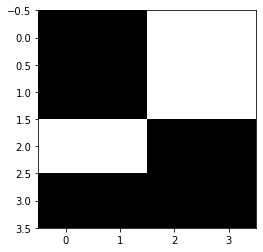

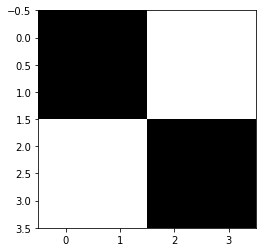

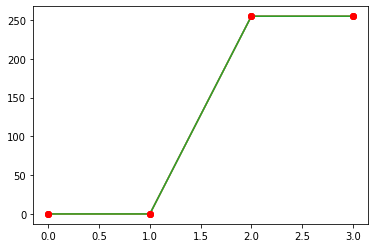

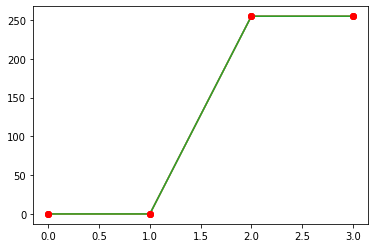

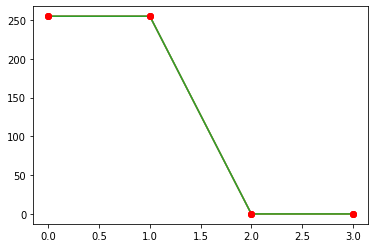

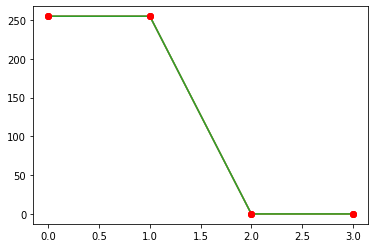

array([[[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=int32)

In [31]:
## Downscaling

inter_nearest_resize(sample2, shape=(4,4), debug=True)


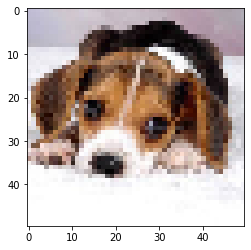

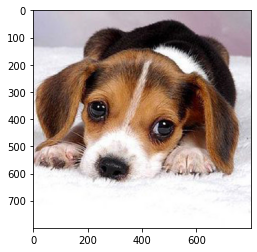

In [32]:
## Using on actual image

### Underscaling
plt.imshow(inter_nearest_resize(im, (50, 50)))
plt.show()

### Overscaling
plt.imshow(inter_nearest_resize(im, (800, 800)))

plt.show()

### Cubic



In [33]:
from scipy.interpolate import CubicSpline

In [34]:
x = np.linspace(0, 10)

y = [1 if xi < 2 else 0 if xi < 4 else 3 if xi <6 else 10 for xi in x]

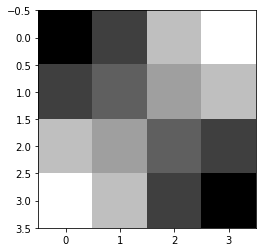

In [35]:
plt.imshow(cv2.resize(sample.astype(np.float32), (4,4), interpolation=cv2.INTER_LINEAR).astype(np.int32))

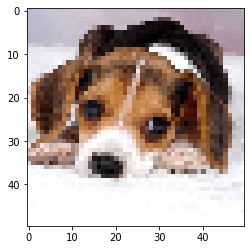

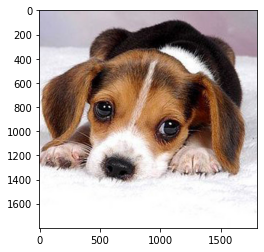

In [36]:
plt.imshow(cv2.resize(im, (50,50), interpolation=cv2.INTER_CUBIC))
plt.show()
plt.imshow(cv2.resize(im, (1800,1800), interpolation=cv2.INTER_CUBIC))

plt.show()

### Area

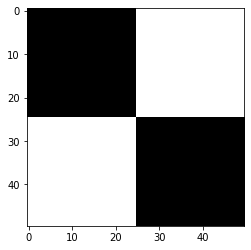

In [37]:

plt.imshow(cv2.resize(sample.astype(np.float32), (50,50), interpolation=cv2.INTER_AREA).astype(np.int32))

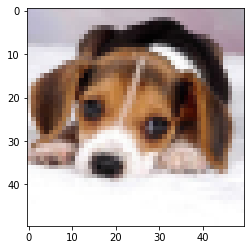

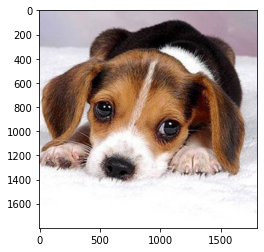

In [38]:

plt.imshow(cv2.resize(im, (50,50), interpolation=cv2.INTER_AREA))
plt.show()
plt.imshow(cv2.resize(im, (1800,1800), interpolation=cv2.INTER_AREA))

plt.show()